# FINAL TASK KALBE NUTRITIONAL DATA SCIENTIST - CLUSTERING

## IMPORT LIBRARIES

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans

## IMPORT DATA

In [2]:
df_transaction = pd.read_csv('transaction.csv', delimiter=';')
df_store = pd.read_csv('store.csv', delimiter=';')
df_customer = pd.read_csv('customers.csv', delimiter=';')
df_product = pd.read_csv('product.csv', delimiter=';')

## DATA CLEANING

In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [4]:
# INPUTASI NILAI KOSONG KOLOM 'Marital Status'

df_customer = df_customer.fillna('Married')

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [6]:
# MENGUBAH TANDA , DALAM KOLOM 'Income'

df_customer['Income'] = df_customer['Income'].replace(',', '.', regex=True)

In [7]:
# MENGUBAH TIPE DATA KOLOM 'Income'

df_customer['Income'] = df_customer['Income'].astype('float64')

In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  447 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   storeid     14 non-null     int64  
 1   storename   14 non-null     object 
 2   groupstore  14 non-null     object 
 3   Type        14 non-null     object 
 4   latitude    14 non-null     float64
 5   longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 804.0+ bytes


In [10]:
# MENGUBAH NAMA KOLOM MENJADI HURUF KAPITAL

df_store.rename(columns={
    'storeid': 'StoreID',
    'storename': 'StoreName',
    'groupstore': 'GroupStore',
    'latitude': 'Latitude',
    'longitude': 'Longitude'
}, inplace=True)

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 804.0+ bytes


In [11]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [12]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [13]:
df_transaction['TransactionID'].value_counts()

TransactionID
TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: count, Length: 4908, dtype: int64

In [14]:
df_transaction[df_transaction['TransactionID'] == 'TR71313']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,21/05/2022,P1,8800,10,88000,8
3336,TR71313,401,30/08/2022,P3,7500,6,45000,11
3722,TR71313,370,26/09/2022,P3,7500,2,15000,3


In [15]:
df_transaction.sort_values(by='Date', ascending=False)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
5019,TR85684,55,31/12/2022,P8,16000,1,16000,6
5013,TR38129,253,31/12/2022,P3,7500,5,37500,4
5008,TR12821,203,31/12/2022,P3,7500,1,7500,10
5009,TR13635,408,31/12/2022,P7,9400,4,37600,3
5011,TR31574,212,31/12/2022,P7,9400,2,18800,13
...,...,...,...,...,...,...,...,...
9,TR7596,270,01/01/2022,P7,9400,2,18800,14
10,TR76340,287,01/01/2022,P4,12000,4,48000,12
11,TR97336,233,01/01/2022,P7,9400,2,18800,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1


In [16]:
df_transaction = df_transaction.drop_duplicates(subset='TransactionID', keep='first')
df_transaction['TransactionID'].value_counts()

TransactionID
TR11369    1
TR7241     1
TR25557    1
TR15572    1
TR11870    1
          ..
TR6576     1
TR59105    1
TR54351    1
TR52555    1
TR85684    1
Name: count, Length: 4908, dtype: int64

## MERGING DATA

In [17]:
df = pd.merge(df_transaction, df_customer, on='CustomerID', how='inner')

In [18]:
df = pd.merge(df, df_store, on='StoreID', how='inner')
df = pd.merge(df, df_product, on='ProductID', how='inner')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500


In [19]:
df = df.drop(columns=['Price_x'])

In [20]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
1,TR89318,183,17/07/2022,P3,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
2,TR9106,123,26/09/2022,P3,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
3,TR4331,335,08/01/2022,P3,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500
4,TR6445,181,10/01/2022,P3,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500


In [21]:
df.rename(columns={'Price_y': 'Price'}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   4908 non-null   object 
 1   CustomerID      4908 non-null   int64  
 2   Date            4908 non-null   object 
 3   ProductID       4908 non-null   object 
 4   Qty             4908 non-null   int64  
 5   TotalAmount     4908 non-null   int64  
 6   StoreID         4908 non-null   int64  
 7   Age             4908 non-null   int64  
 8   Gender          4908 non-null   int64  
 9   Marital Status  4908 non-null   object 
 10  Income          4908 non-null   float64
 11  StoreName       4908 non-null   object 
 12  GroupStore      4908 non-null   object 
 13  Type            4908 non-null   object 
 14  Latitude        4908 non-null   float64
 15  Longitude       4908 non-null   float64
 16  Product Name    4908 non-null   object 
 17  Price           4908 non-null   i

In [23]:
# MENGUBAH TIPE DATA KOLOM 'Date'

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4908 non-null   object        
 1   CustomerID      4908 non-null   int64         
 2   Date            4908 non-null   datetime64[ns]
 3   ProductID       4908 non-null   object        
 4   Qty             4908 non-null   int64         
 5   TotalAmount     4908 non-null   int64         
 6   StoreID         4908 non-null   int64         
 7   Age             4908 non-null   int64         
 8   Gender          4908 non-null   int64         
 9   Marital Status  4908 non-null   object        
 10  Income          4908 non-null   float64       
 11  StoreName       4908 non-null   object        
 12  GroupStore      4908 non-null   object        
 13  Type            4908 non-null   object        
 14  Latitude        4908 non-null   float64       
 15  Long

## CLUSTERING

In [27]:
cluster = df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum',
    'Age': 'first'
}).reset_index().rename(columns={
    'TransactionID': 'count_transaction',
    'Qty': 'total_quantity'
})

In [28]:
cluster.head()

,CustomerID,count_transaction,total_quantity,TotalAmount,Age
0,1,17,60,623300,55
1,2,13,57,392300,60
2,3,15,56,446200,32
3,4,10,46,302500,31
4,5,7,27,268600,58


In [30]:
data_cluster = cluster.drop(columns=['CustomerID'])
data_cluster_normalize = preprocessing.normalize(data_cluster)
data_cluster_normalize

array([[2.72741855e-05, 9.62618313e-05, 9.99999991e-01, 8.82400120e-05],
       [3.31379039e-05, 1.45296963e-04, 9.99999977e-01, 1.52944172e-04],
       [3.36172116e-05, 1.25504257e-04, 9.99999989e-01, 7.17167182e-05],
       ...,
       [3.06539506e-05, 1.15803813e-04, 9.99999989e-01, 8.68528601e-05],
       [2.59862978e-05, 9.92204096e-05, 9.99999986e-01, 1.34656270e-04],
       [2.95925332e-05, 9.56066457e-05, 9.99999987e-01, 1.22922830e-04]])

In [32]:
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_cluster_normalize)
    fits.append(model)
    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

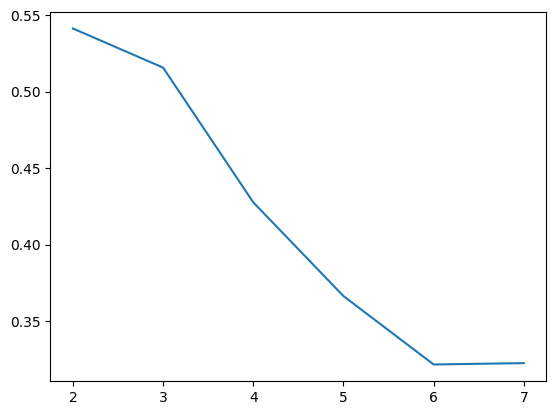

In [33]:
sns.lineplot(x = K, y = score);

In [50]:
fits[4]

KMeans(n_clusters=6, n_init='auto', random_state=0)

In [51]:
cluster['cluster_label'] = fits[3].labels_

In [52]:
cluster.head()

,CustomerID,count_transaction,total_quantity,TotalAmount,Age,cluster_label
0,1,17,60,623300,55,4
1,2,13,57,392300,60,3
2,3,15,56,446200,32,4
3,4,10,46,302500,31,0
4,5,7,27,268600,58,1


In [53]:
cluster.groupby(['cluster_label']).agg({
    'CustomerID' : 'count',
    'count_transaction' : 'mean',
    'total_quantity' : 'mean',
    'Age' : 'mean'
}).sort_values(by='Age', ascending=True)

,CustomerID,count_transaction,total_quantity,Age
cluster_label,,,,
4,133,13.000000,49.338346,29.150376
0,144,11.659722,42.368056,39.722222
3,107,9.392523,32.859813,46.897196
1,53,8.264151,28.490566,50.075472
2,10,5.700000,21.400000,51.400000
